In [1]:
import pandas as pd

import plotnine
from plotnine import *

dpi=300

In [2]:
df=pd.read_csv('../data/Fig4C.csv', index_col=0)

In [3]:
order_of_celltypes=[
    'AT1', 
    'AT2', 
    'B & Plasma cells', 
    'Ciliated', 
    'Fibroblasts', 
    'Lymphatic Endothelial cells',
    'Mast', 
    'Mixed (<70%)',
    'Monocyte/Macrophage',
    'Mural cells',
    'Secretory',
    'T & NK cells',
    'Vascular Endothelial cells'
][::-1]

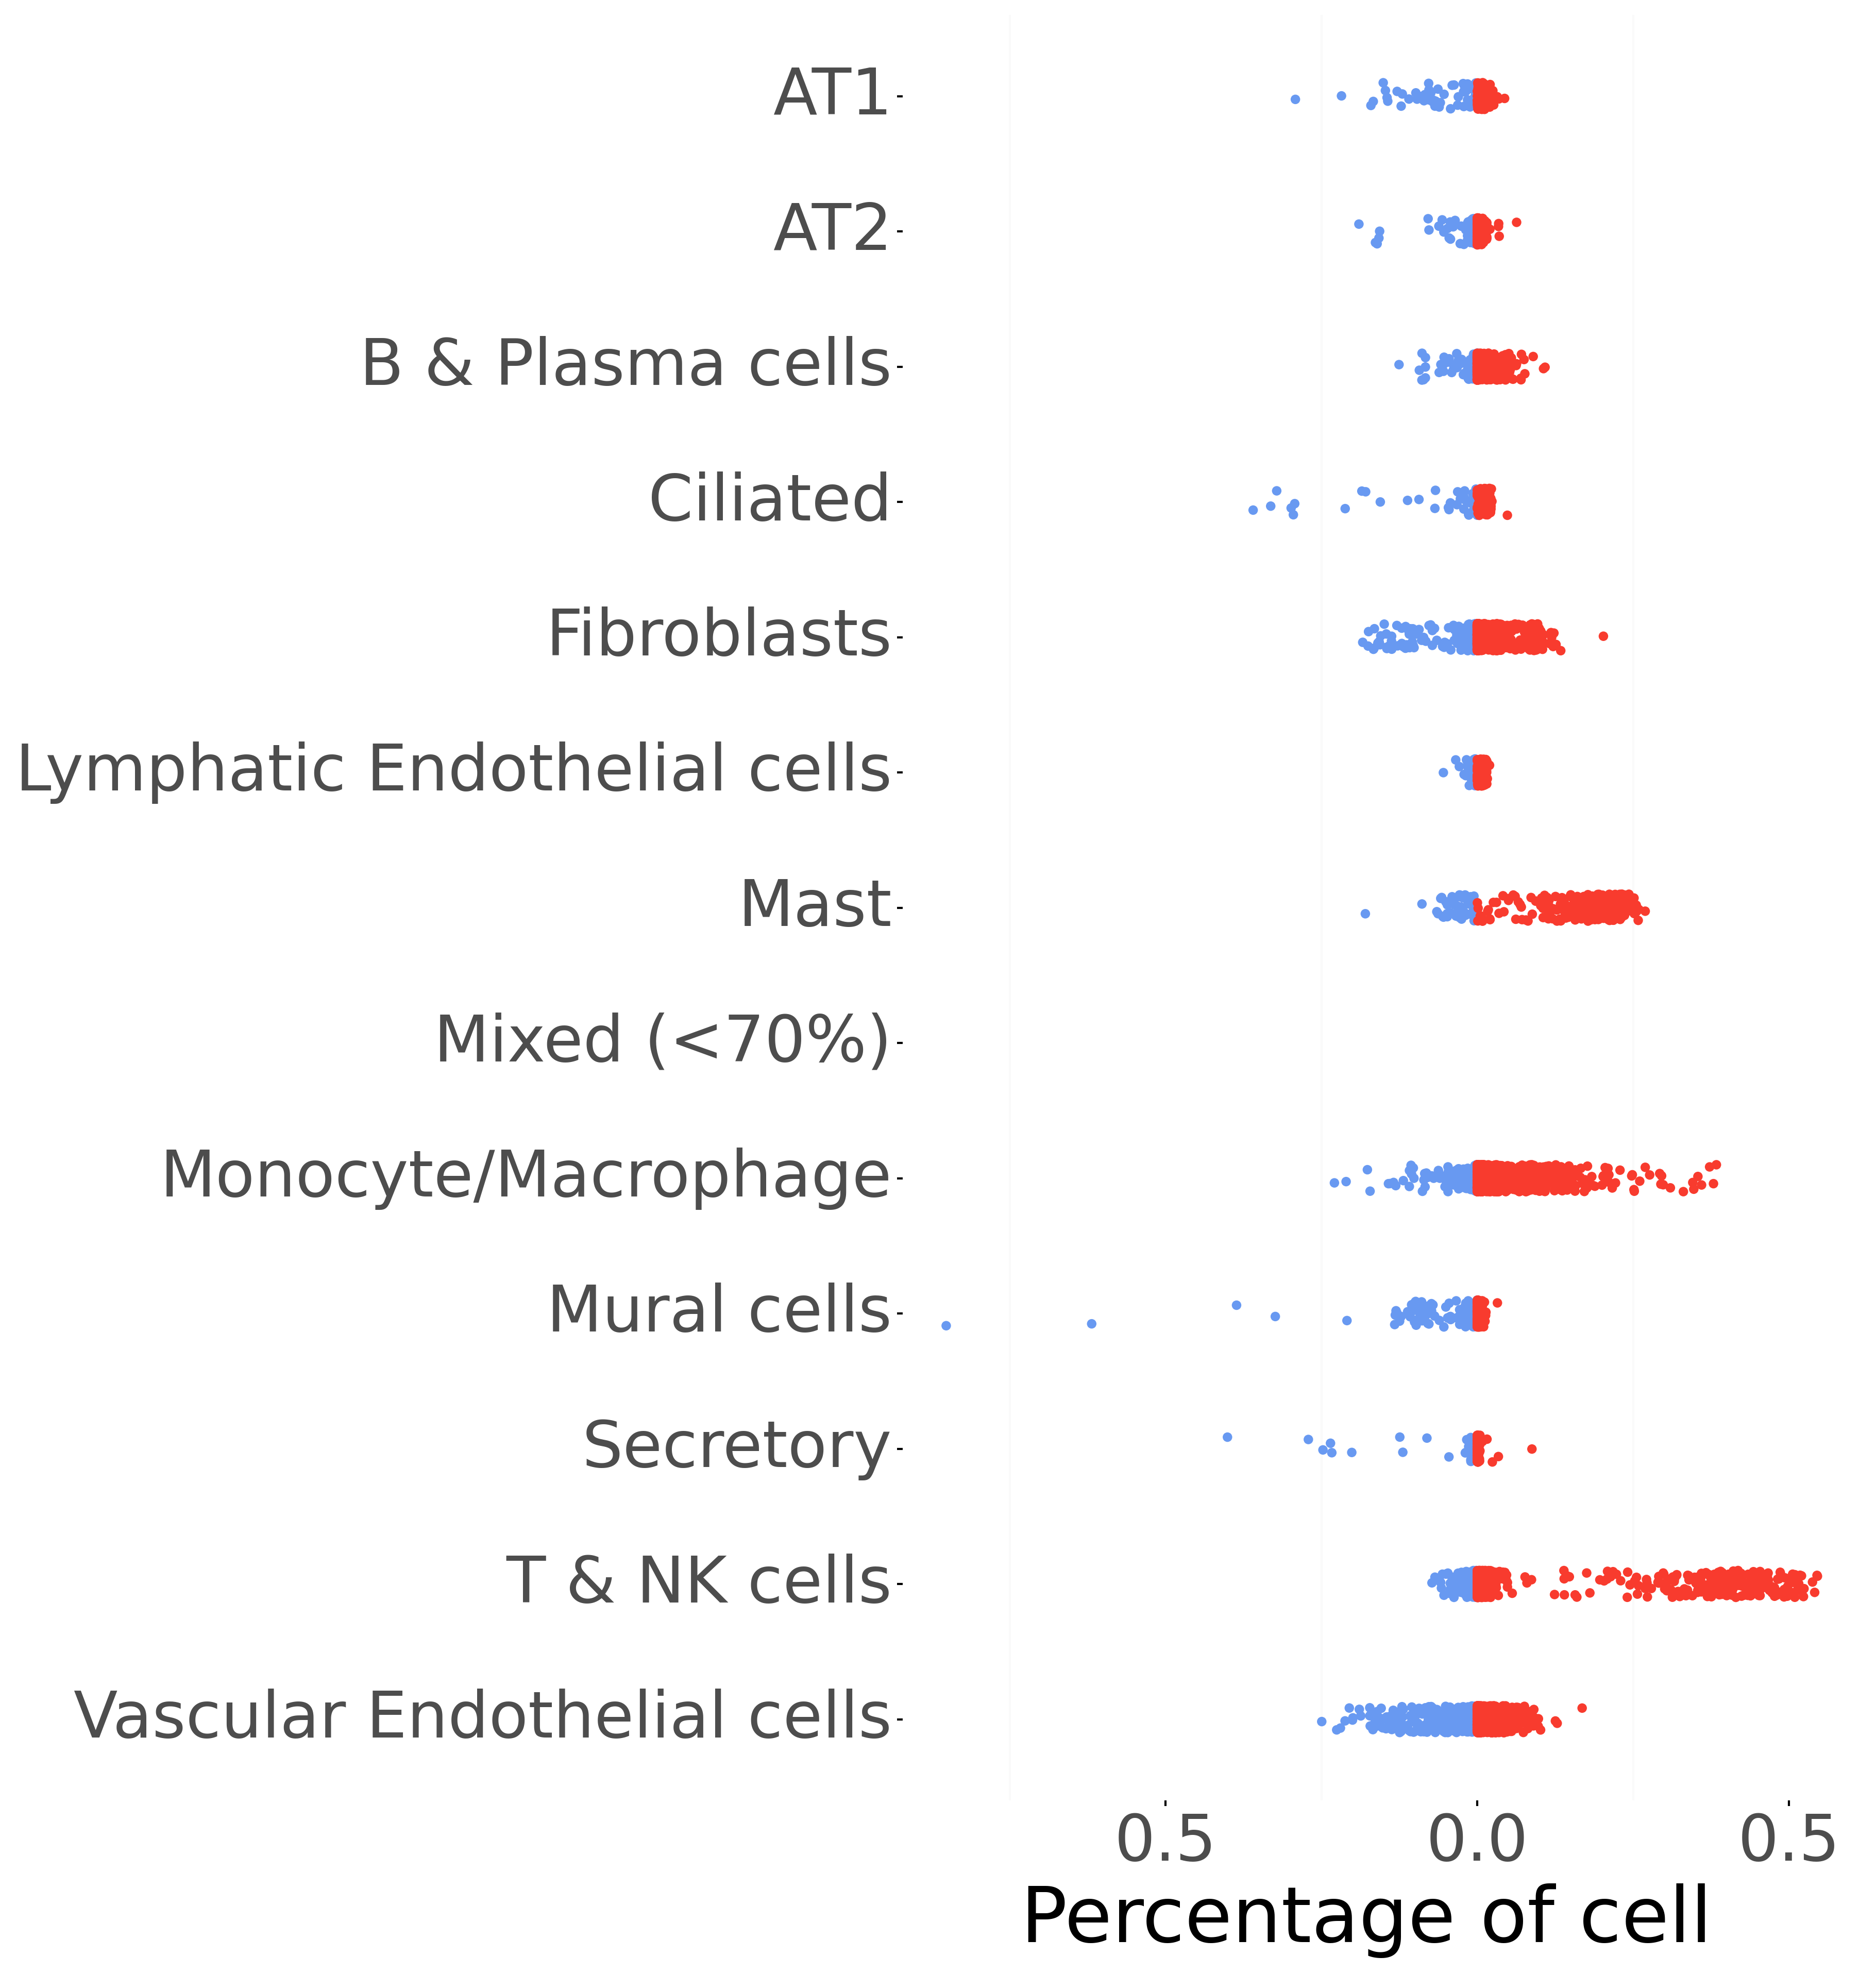

<ggplot: (8776149008813)>

In [4]:
plotnine.options.figure_size=(8,15)
plotnine.dpi=dpi

p1=(
        ggplot() 
        + geom_jitter(
            data=df[df.Background == 'Control'], 
            mapping=aes(
                y='-Abundance', 
                x='Celltype' ), 
            colour='#6899F1',
            width=.1
        ) 
        + geom_jitter(
            data=df[df.Background != 'Control'],
            mapping=aes(
                y='Abundance',
                x='Celltype'
            ), 
            colour='#F83B2E', 
            width=.1
        ) 
        + coord_flip() 
        + theme_bw() 
        + theme(
            axis_text=element_text(size=30), 
            title=element_text(size=36), 
            axis_title=element_text(size=36), 
            panel_grid_major=element_blank(),
            strip_background_y= element_blank(),
            strip_text_y=element_blank(),
            panel_border=element_blank(),
            legend_position='none',
            dpi=dpi
        )  
        + scale_x_discrete(limits=order_of_celltypes) 
        + scale_y_continuous(labels=lambda x: [str(abs(i)) if i > 0 else f'{abs(i)}' for i in x]) 
        + labs(x='', y='Percentage of cell')
)

# ggsave(p1, "Fig4C.pdf", format="pdf")

p1